# **1. Perkenalan Dataset**


### Pengenalan Dataset: Airline Passenger Satisfaction

Dataset ini berisi hasil survei kepuasan penumpang dari sebuah maskapai penerbangan. Fokus utama dari data ini adalah untuk memahami faktor-faktor apa saja yang mendorong kepuasan pelanggan.

---

##### 1. Tujuan Utama
Dataset ini dirancang untuk tugas **Klasifikasi** dalam *Machine Learning*. Targetnya adalah memprediksi status kepuasan penumpang yang terbagi menjadi dua kategori:
* **Satisfied** (Puas)
* **Neutral or Dissatisfied** (Netral atau Tidak Puas)

##### 2. Fitur-Fitur Dataset
Dataset ini memiliki sekitar **25 kolom** yang mencakup berbagai dimensi pengalaman penumpang:

* **Informasi Demografis & Profil:** Jenis kelamin, usia, tipe pelanggan (*Loyal/Disloyal*), dan tipe perjalanan (*Business/Personal travel*).
* **Detail Penerbangan:** Kelas penerbangan (*Business, Eco, Eco Plus*), jarak penerbangan, serta durasi keterlambatan keberangkatan dan kedatangan.
* **Penilaian Layanan (Skala 1-5):**
    * Kualitas Wi-Fi di pesawat.
    * Kenyamanan waktu keberangkatan/kedatangan.
    * Kemudahan pemesanan tiket online.
    * Lokasi gerbang (*gate*).
    * Kualitas makanan dan minuman.
    * Kenyamanan kursi dan ruang kaki (*leg room*).
    * Hiburan dalam pesawat (*inflight entertainment*).
    * Layanan kru kabin dan kebersihan pesawat.
    * Penanganan bagasi dan layanan *check-in*.

##### 3. Struktur Data
* **Target Variable:** `satisfaction`
* **Pembagian Data:** * `train.csv`: ±103.000 baris (digunakan untuk melatih model).
    * `test.csv`: ±25.000 baris (digunakan untuk menguji performa model).
* **Karakteristik:** Data ini relatif bersih, sehingga sangat ideal untuk latihan *Data Cleaning*, *Exploratory Data Analysis* (EDA), dan pengembangan model prediksi.

##### 4. Relevansi Bisnis
Analisis terhadap dataset ini memberikan wawasan strategis bagi maskapai untuk menentukan prioritas perbaikan layanan. Misalnya, perusahaan dapat mengevaluasi apakah investasi pada kualitas Wi-Fi memberikan dampak kepuasan yang lebih besar dibandingkan peningkatan kualitas makanan.

##### 5. Tautan Dataset
(https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

# **2. Import Library**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

In [34]:
path_raw = "../Airline Passenger Satisfaction/train.csv"
df = pd.read_csv(path_raw)

# **4. Exploratory Data Analysis (EDA)**



In [35]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [37]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [38]:
df.shape

(103904, 25)

In [39]:
print("--- Missing Values ---")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

--- Missing Values ---
Arrival Delay in Minutes    310
dtype: int64


In [40]:
df.duplicated().sum()

np.int64(0)

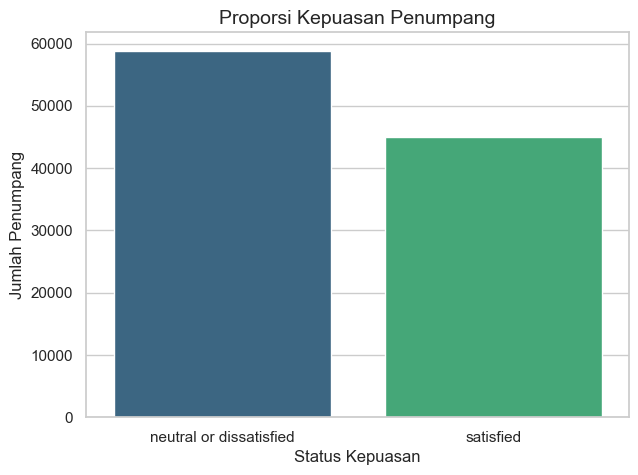

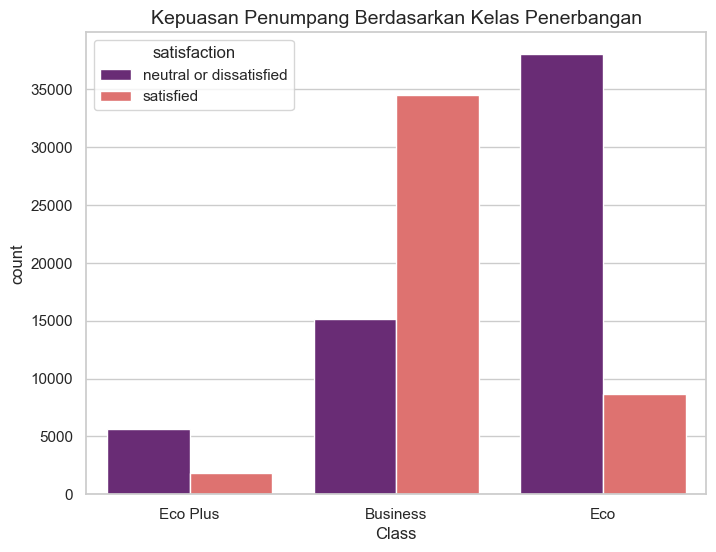

C:\Users\Acer\AppData\Local\Temp\ipykernel_22376\2023094050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y='Age', palette='Set2')


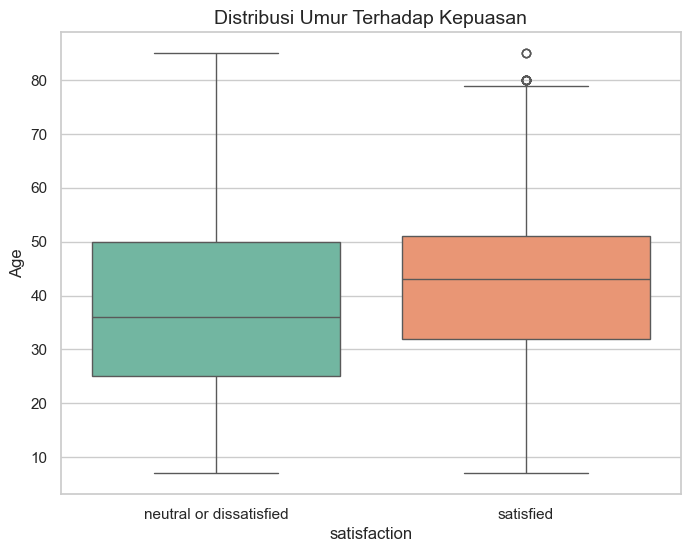

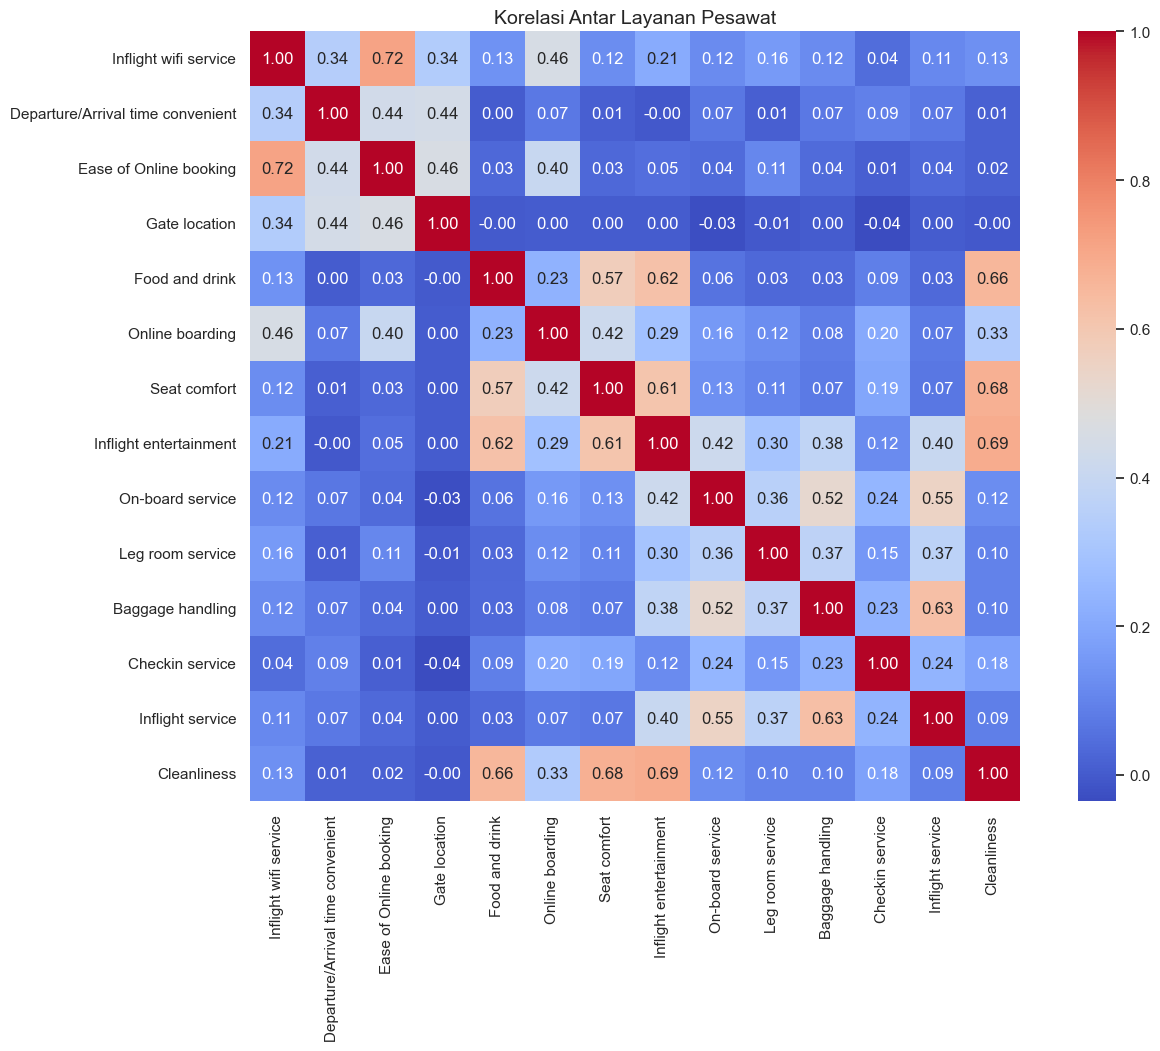

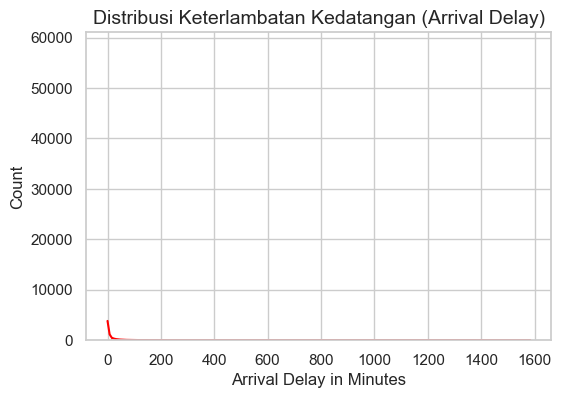

In [41]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='satisfaction', hue='satisfaction', palette='viridis', legend=False)
plt.title('Proporsi Kepuasan Penumpang', fontsize=14)
plt.xlabel('Status Kepuasan', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', hue='satisfaction', palette='magma')
plt.title('Kepuasan Penumpang Berdasarkan Kelas Penerbangan', fontsize=14)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='satisfaction', y='Age', palette='Set2')
plt.title('Distribusi Umur Terhadap Kepuasan', fontsize=14)
plt.show()

plt.figure(figsize=(15, 10))
service_cols = df.columns[8:22]
corr_matrix = df[service_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korelasi Antar Layanan Pesawat', fontsize=14)
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['Arrival Delay in Minutes'].dropna(), kde=True, color='red')
plt.title('Distribusi Keterlambatan Kedatangan (Arrival Delay)', fontsize=14)
plt.show()

# **5. Data Preprocessing**

In [42]:
cols_to_drop = ['Unnamed: 0', 'id']
df = df.drop([c for c in cols_to_drop if c in df.columns], axis=1)

In [43]:
if 'Arrival Delay in Minutes' in df.columns:
    median_val = df['Arrival Delay in Minutes'].median()
    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(median_val)

df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [44]:
le = LabelEncoder()

cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [45]:
scaler = StandardScaler()

num_cols = [
    'Age', 'Flight Distance', 'Inflight wifi service',
    'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service',
    'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

existing_num_cols = [c for c in num_cols if c in df.columns]

df[existing_num_cols] = scaler.fit_transform(df[existing_num_cols])

df[existing_num_cols].head()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554


In [ ]:
folder_path = "../Airline Passenger Satisfaction_Cleaned2"
file_path = os.path.join(folder_path, "train_preprocessed.csv")

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

df.to_csv(file_path, index=False)